In [17]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import ringity as rig

plt.rcdefaults()

In [18]:
G = nx.Graph()
G.add_nodes_from(range(11))

# define point cloud positons roughly as 2 circles
pos = {
    0: [0, 1.5],
    1: [0, -1],
    2: [1, 0],
    3: [-1, 0],
    4: [0.7, 1],
    5: [-0.7, 1],
    6: [0.7, -0.7],
    7: [-0.7, -0.7],
    8: [0.5, -1.5],
    9: [-0.5, -1.5],
    10: [0, -2],
}

# perturbe the point cloud for more random look
scale = 0.5
rng = np.random.default_rng(15)
for node, xy in pos.items():
    pos[node][0] += scale * (0.5 - rng.random())
    pos[node][1] += scale * (0.5 - rng.random())

In [19]:
# constants
base_color = "k"
little_hole_color = "C1"
big_hole_color = "C0"
point_size = 100
radius_alpha = 0.25
xlim_left = -3
xlim_right = 3
ylim_bottom = -4
ylim_top = 3
steps = range(5)

little_hole_nodes = [1, 7, 8, 9, 10]
little_hole_edges = [
    [ 1,  8],
    [ 8, 10],
    [10,  9],
    [ 7,  9],
    [ 1,  7],
]
big_hole_nodes = [0, 1, 2, 3, 4, 5, 6, 7]
big_hole_edges = [
    [0, 4],
    [4, 2],
    [2, 6],
    [6, 1],
    [1, 7],
    [7, 3],
    [3, 5],
    [5, 0],
]

little_hole_birth = 1
little_hole_death = 2
big_hole_birth = 2
big_hole_death = 4

In [20]:
G.add_edges_from(little_hole_edges)
G.add_edges_from(big_hole_edges)

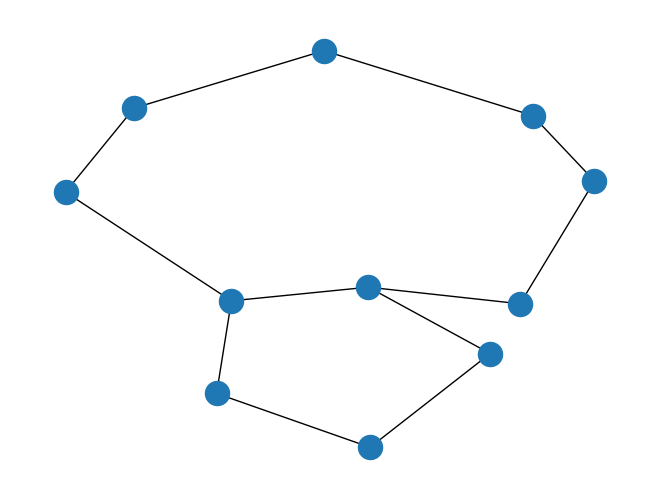

In [21]:
nx.draw(G, pos=pos)

In [22]:
dgm = rig.diagram(G)
score = rig.ring_score(dgm)
score

0.8101562484563329

In [23]:
alt_little_hole_nodes = [i+11 for i in little_hole_nodes]
alt_big_hole_nodes = [i+11 for i in big_hole_nodes]

alt_little_hole_edges = [edge for edge in little_hole_edges]
for i in alt_little_hole_edges:
    i[0]+=11
    i[1]+=11
    
alt_big_hole_edges = [edge for edge in big_hole_edges]
for i in alt_big_hole_edges:
    i[0]+=11
    i[1]+=11

In [28]:
other_edges = [[i,i+11] for i in range(11)]

In [29]:
G.add_edges_from(other_edges)
G.add_edges_from(alt_big_hole_edges)
G.add_edges_from(alt_little_hole_edges)

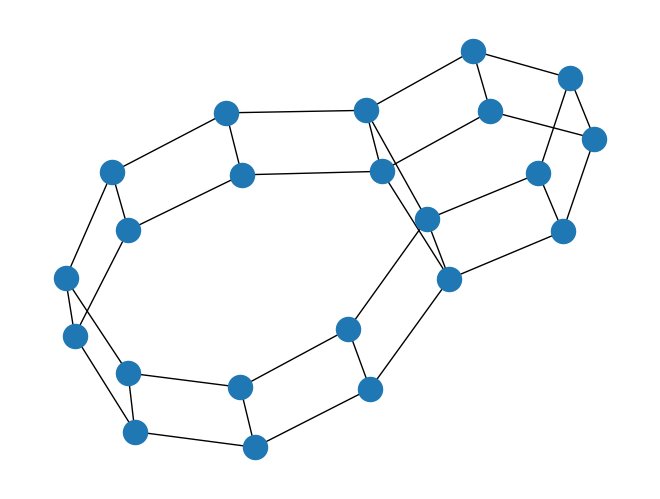

In [30]:
nx.draw(G)

In [31]:
dgm = rig.diagram(G)
dgm.ring_score()

0.75

### 1.1 loose point cloud

[]

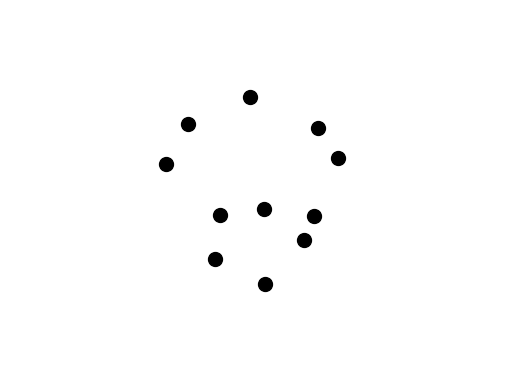

In [19]:
fig, ax = plt.subplots()

# points
nx.draw_networkx_nodes(G, pos, ax=ax, node_color=base_color, node_size=point_size)

ax.set_xlim(xlim_left, xlim_right)
ax.set_ylim(ylim_bottom, ylim_top)
ax.axis("off")
plt.savefig("point_cloud.png")
plt.plot()

### 1.2 little hole birth

[]

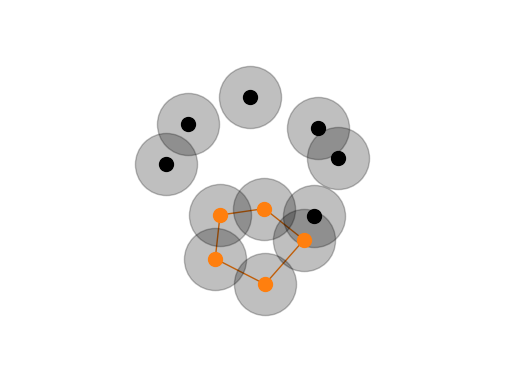

In [20]:
fig, ax = plt.subplots()

# radii
nx.draw_networkx_nodes(G, pos, ax=ax, node_color=base_color, node_size=2000, alpha=radius_alpha)

# points
nx.draw_networkx_nodes(G, pos, ax=ax, nodelist=set(G.nodes).difference(little_hole_nodes), node_color=base_color, node_size=point_size)

# little hole nodes
nx.draw_networkx_nodes(G, pos, ax=ax, nodelist=little_hole_nodes, node_color=little_hole_color, node_size=point_size)

# little hole edges
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=little_hole_edges, edge_color=little_hole_color)

ax.set_xlim(xlim_left, xlim_right)
ax.set_ylim(ylim_bottom, ylim_top)
ax.axis("off")
plt.savefig("little_hole_birth.png")
plt.plot()

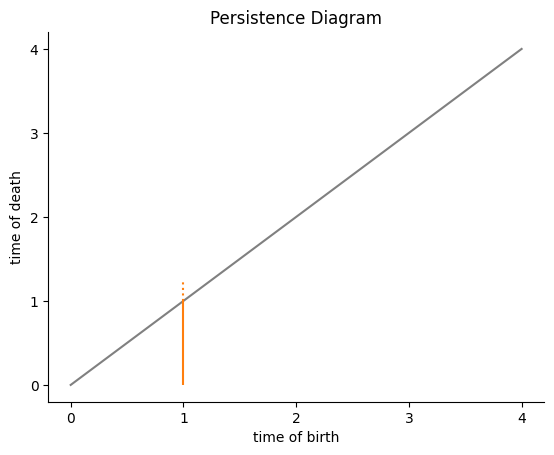

In [21]:
fig, ax = plt.subplots()

# diagonal
ax.plot(steps, steps, color="grey")

# little hole
ax.vlines(little_hole_birth, 0, 1, color=little_hole_color)
ax.vlines(little_hole_birth, 1, 1.25, color=little_hole_color, linestyles="dotted")

ax.set_xticks(steps)
ax.set_yticks(steps)
ax.set_xlabel("time of birth")
ax.set_ylabel("time of death")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("Persistence Diagram")
plt.savefig("little_hole_birth_dgm.png")
plt.show()

### 1.3 little hole death & big hole birth

[]

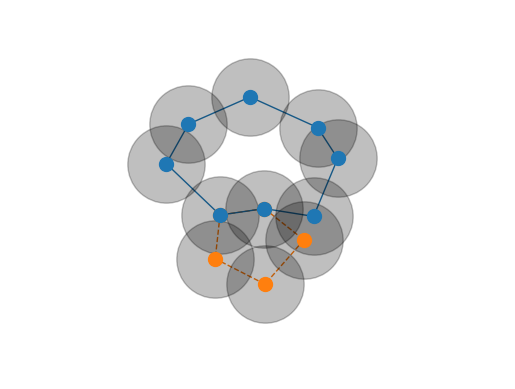

In [22]:
fig, ax = plt.subplots()

# radii
nx.draw_networkx_nodes(G, pos, ax=ax, node_color=base_color, node_size=3100, alpha=radius_alpha)

# little hole nodes
nx.draw_networkx_nodes(G, pos, ax=ax, nodelist=little_hole_nodes, node_color=little_hole_color, node_size=point_size)

# little hole edges
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=little_hole_edges, edge_color=little_hole_color, style="dashed")

# big hole nodes
nx.draw_networkx_nodes(G, pos, ax=ax, nodelist=big_hole_nodes, node_color=big_hole_color, node_size=point_size)

# big hole edges
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=big_hole_edges, edge_color=big_hole_color)


ax.set_xlim(xlim_left, xlim_right)
ax.set_ylim(ylim_bottom, ylim_top)
ax.axis("off")
plt.savefig("big_hole_birth.png")
plt.plot()

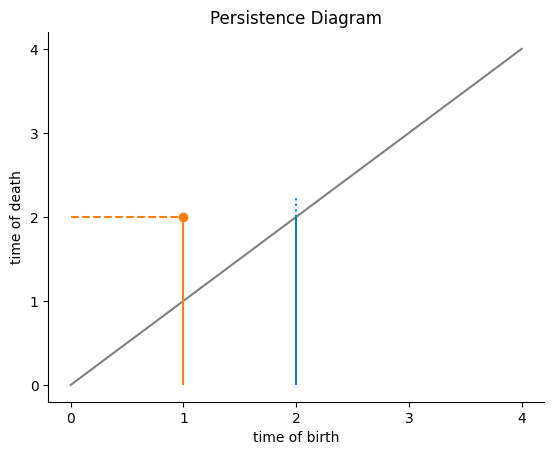

In [23]:
fig, ax = plt.subplots()

# diagonal
ax.plot(steps, steps, color="grey")

# little hole
ax.hlines(little_hole_death, 0, little_hole_birth, color=little_hole_color, linestyles="dashed")
ax.vlines(little_hole_birth, 0, little_hole_death, color=little_hole_color)
ax.plot([little_hole_birth], [little_hole_death], "o", color=little_hole_color)

# big hole
ax.vlines(big_hole_birth, 0, 2, color=big_hole_color)
ax.vlines(big_hole_birth, 2, 2.25, color=big_hole_color, linestyles="dotted")

ax.set_xticks(steps)
ax.set_yticks(steps)
ax.set_xlabel("time of birth")
ax.set_ylabel("time of death")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("Persistence Diagram")
plt.savefig("big_hole_birth_dgm.png")
plt.show()

### 1.4 big hole persistence

[]

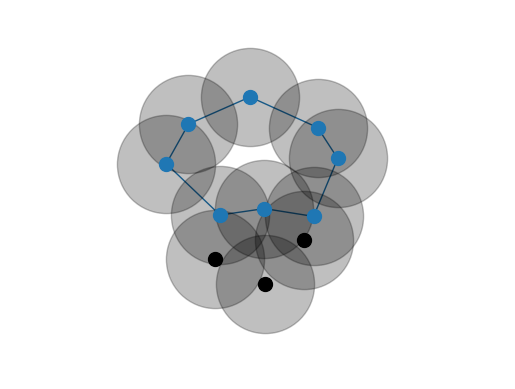

In [24]:
fig, ax = plt.subplots()

# radii
nx.draw_networkx_nodes(G, pos, ax=ax, node_color=base_color, node_size=5000, alpha=radius_alpha)

# points
nx.draw_networkx_nodes(G, pos, ax=ax, nodelist=set(G.nodes).difference(big_hole_nodes), node_color=base_color, node_size=point_size)

# big hole nodes
nx.draw_networkx_nodes(G, pos, ax=ax, nodelist=big_hole_nodes, node_color=big_hole_color, node_size=point_size)

# big hole edges
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=big_hole_edges, edge_color=big_hole_color)

ax.set_xlim(xlim_left, xlim_right)
ax.set_ylim(ylim_bottom, ylim_top)
ax.axis("off")
plt.savefig("big_hole_persist.png")
plt.plot()

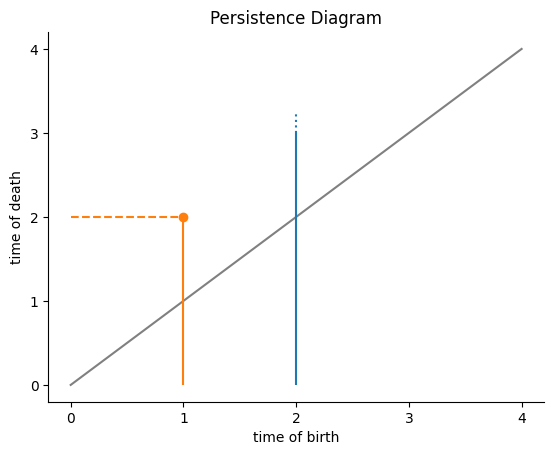

In [25]:
fig, ax = plt.subplots()

# diagonal
ax.plot(steps, steps, color="grey")

# little hole
ax.hlines(little_hole_death, 0, little_hole_birth, color=little_hole_color, linestyles="dashed")
ax.vlines(little_hole_birth, 0, little_hole_death, color=little_hole_color)
ax.plot([little_hole_birth], [little_hole_death], "o", color=little_hole_color)

# big hole
ax.vlines(big_hole_birth, 0, 3, color=big_hole_color)
ax.vlines(big_hole_birth, 3, 3.25, color=big_hole_color, linestyles="dotted")

ax.set_xticks(steps)
ax.set_yticks(steps)
ax.set_xlabel("time of birth")
ax.set_ylabel("time of death")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("Persistence Diagram")
plt.savefig("big_hole_persist_dgm.png")
plt.show()

### 1.5 big hole death

[]

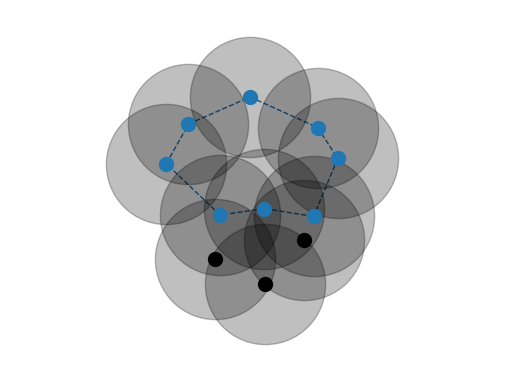

In [26]:
fig, ax = plt.subplots()

# radii
nx.draw_networkx_nodes(G, pos, ax=ax, node_color=base_color, node_size=7500, alpha=radius_alpha)

# points
nx.draw_networkx_nodes(G, pos, ax=ax, nodelist=set(G.nodes).difference(big_hole_nodes), node_color=base_color, node_size=point_size)

# big hole nodes
nx.draw_networkx_nodes(G, pos, ax=ax, nodelist=big_hole_nodes, node_color=big_hole_color, node_size=point_size)

# big hole edges
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=big_hole_edges, edge_color=big_hole_color, style="dashed")

ax.set_xlim(xlim_left, xlim_right)
ax.set_ylim(ylim_bottom, ylim_top)
ax.axis("off")
plt.savefig("big_hole_death.png")
plt.plot()

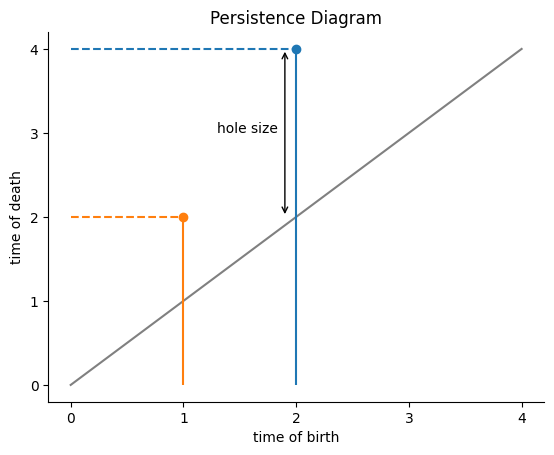

In [27]:
fig, ax = plt.subplots()

# diagonal
ax.plot(steps, steps, color="grey")

# little hole
ax.hlines(little_hole_death, 0, little_hole_birth, color=little_hole_color, linestyles="dashed")
ax.vlines(little_hole_birth, 0, little_hole_death, color=little_hole_color)
ax.plot([little_hole_birth], [little_hole_death], "o", color=little_hole_color)

# big hole
ax.hlines(big_hole_death, 0, big_hole_birth, color=big_hole_color, linestyles="dashed")
ax.vlines(big_hole_birth, 0, big_hole_death, color=big_hole_color)
ax.plot([big_hole_birth], [big_hole_death], "o", color=big_hole_color)

# hole size
offset = 0.1
ax.annotate("hole size", xy=(1.3, 3))
ax.annotate("", xy=(big_hole_birth-offset, big_hole_birth), xytext=(big_hole_birth-offset, big_hole_death), arrowprops=dict(arrowstyle="<->"))

ax.set_xticks(steps)
ax.set_yticks(steps)
ax.set_xlabel("time of birth")
ax.set_ylabel("time of death")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title("Persistence Diagram")
plt.savefig("big_hole_death_dgm.png")
plt.show()